In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [34]:
image_height = 150
image_width = 150
batch_size = 32
num_epochs = 15
learning_rate = 0.001
train_data_dir = "C:\\Users\\JOUD\\Desktop\\yaseer\\Dataset\\Training"
test_data_dir = "C:\\Users\\JOUD\\Desktop\\yaseer\\Dataset\\Test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('model_weights.keras', save_best_only=True),
    ReduceLROnPlateau(factor=0.1, patience=3)
]
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=callbacks
)

Found 319 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 91s 6s/step - accuracy: 0.4195 - loss: 1.6628 - val_accuracy: 1.0000 - val_loss: 0.0797 - learning_rate: 0.0010
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 302ms/step - accuracy: 0.8750 - loss: 0.4094 - val_accuracy: 1.0000 - val_loss: 0.0558 - learning_rate: 0.0010
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.8866 - loss: 0.3162 - val_accuracy: 1.0000 - val_loss: 0.0410 - learning_rate: 0.0010
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.9375 - loss: 0.1679 - val_accuracy: 1.0000 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 73s 5s/step - accuracy: 0.9488 - loss: 0.1520 - val_accuracy: 0.9531 - val_loss: 0.0866 - learning_rate: 0.0010
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.9688 - loss: 0.1494 - val_accuracy: 1.0000 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 7/15
9/9 ━━━━━━━━━━

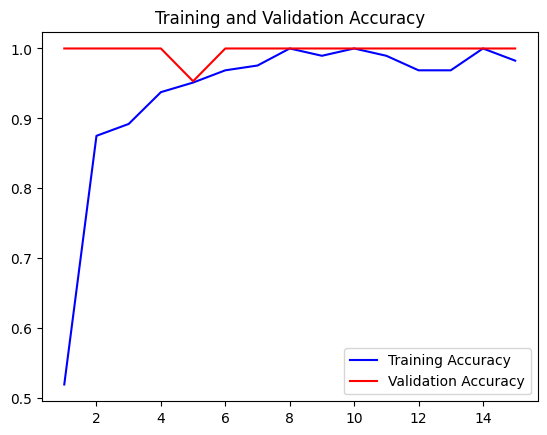

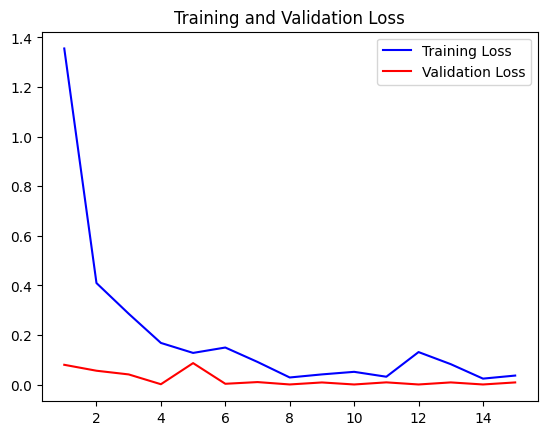

2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 1.0000 - loss: 0.0081
Test Loss: 0.00852218922227621
Test Accuracy: 1.0


In [35]:
def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

plot_training_curves(history)
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [36]:

def get_image_predictions(model, image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = train_generator.class_indices
    inverted_class = {value: key for key, value in predicted_class.items()}
    predicted_label = inverted_class[np.argmax(predictions)]

    return predicted_label

In [38]:

test_directory = "C:\\Users\\JOUD\\Desktop\\yaseer\\Dataset\\Test"
test_folders = ["Raed -Test", "Malak - Test", "Sondos - Test", "Lina - Test"]

for folder in test_folders:
    folder_path = os.path.join(test_directory, folder)
    images = os.listdir(folder_path)
    for image in images:
        image_path = os.path.join(folder_path, image)
        predictions = get_image_predictions(model, image_path)
        print('Folder:', folder)
        print('Image:', image)
        print('Predicted Label:', predictions)
        print('------------------')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
Folder: Raed -Test
Image: image1.JPG
Predicted Label: Raed-Training
------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Folder: Raed -Test
Image: image10.JPG
Predicted Label: Raed-Training
------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Folder: Raed -Test
Image: image11.JPG
Predicted Label: Raed-Training
------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Folder: Raed -Test
Image: image12.JPG
Predicted Label: Raed-Training
------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Folder: Raed -Test
Image: image13.JPG
Predicted Label: Raed-Training
------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Folder: Raed -Test
Image: image14.JPG
Predicted Label: Raed-Training
------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Folder: Raed -Test
Image: image15.JPG
Predicted Label: Raed-Training
------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Folder: Raed -Test
Image: image16.JPG
Predicted Label: Raed-Training
----

In [39]:

# Save the trained model
model.save("ModelNum2.keras")

import tensorflow as tf

# Export the model
model.export("ModelNum2", "tf_saved_model")

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("ModelNum2")
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("ModelNum2.tflite", "wb") as f:
    f.write(tflite_model)
    converter = tf.lite.TFLiteConverter.from_saved_model("ModelNum2")
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("ModelNum2.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: ModelNum2\assets


INFO:tensorflow:Assets written to: ModelNum2\assets


Saved artifact at 'ModelNum2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_114')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2332882849424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882853456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882858832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882850768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882858640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882857680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882856528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882857104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882856912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882855952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2332882855376: TensorSpec(shape=(), d